# Integrating PySulfSat with PetThermoTools
- This notebook can perform MELTS calculations, and then go onto calculate the SCSS and SCAS within a single notebook!
- It relies on the python MELTS architecture developed by Paula Antoshechkin at Caltech, and fractional crystallization functions written by Matthew Gleeson at UC Berkeley
- In addition to installing PySulfSat you will need to first download the MELTS python infrastructure from this website (https://magmasource.caltech.edu/gitlist/MELTS_Matlab.git/), and then the PetThermoTools code by uncommenting below
- More information can be found here: https://github.com/gleesonm1/PetThermoTools
You can download the excel spreadsheet with the compositions here:
- https://github.com/PennyWieser/PySulfSat/blob/main/docs/Examples/Integrating_with_PyMELTS/Glass_input_example.xlsx

## If you havent done so already, you need to pip install PySulfSat
- Do this by removing the #. You only need to do this once per computer. After your initial installation, you will want to upgrade instead using the second command


In [5]:
#!pip install PySulfSat
#!pip install PySulfSat --upgrade

## Now you need to append the path to your local MELTS installation

In [6]:
import sys
sys.path.append(r'C:\Users\penny\Box\Berkeley_new\MELTS_python_Paula\melts_matlab_git_master\package')

## And now you need to download the PetThermoTools code by uncommenting this line
- you will need to be on at least 0.1.3 to get the logfo2 output needed here

In [7]:
#!pip install --upgrade PetThermoTools

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PySulfSat as ss
import PetThermoTools as M

In [9]:
### Use these version numbers when communicating problems to Penny (ss) and Matt (M.)

In [10]:
ss.__version__

'1.0.4'

In [11]:
M.__version__

'0.2.3'

## Import data
- Here, we load in some glass EPMA data, and then start a MELTS model from the first row in the loaded spreadsheet

In [12]:
df_out2=ss.import_data('Glass_input_example.xlsx', sheet_name='Glass_input', 
                       suffix="_Liq")
df_out2.head()
# Selecting a single composition to start the model from
sample=df_out2.iloc[0]

We have replaced all missing liquid oxides and strings with zeros. 


In [14]:
type(sample)

pandas.core.series.Series

In [15]:
sample

SiO2_Liq              50.822
TiO2_Liq               2.056
Al2O3_Liq             13.235
FeOt_Liq              13.339
MnO_Liq                0.252
MgO_Liq                6.631
CaO_Liq               11.356
Na2O_Liq                2.49
K2O_Liq                0.247
P2O5_Liq               0.189
H2O_Liq                  0.0
Fe3Fet_Liq               0.0
Ni_Liq_ppm               0.0
Cu_Liq_ppm               0.0
Sample_ID_Liq            H_1
Cr2O3_Liq               0.04
Total_Liq            100.754
Sample_ID_Liq_Liq          0
Name: 0, dtype: object

In [9]:
sample['CO2_Liq']=0.02

C:\Users\penny\AppData\Local\Temp\ipykernel_24896\3063343034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['CO2_Liq']=0.02
C:\Users\penny\AppData\Local\Temp\ipykernel_24896\3063343034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['CO2_Liq']=0.02


## Using PetThermoTools
- Here we initiate a melts fractional crystallizatoin model, see the documentation for that package for more information

In [10]:
P=1000
MELTS_FC=M.multi_path(Model = "MELTSv1.1.0", 
                        Fe3Fet_Liq=0.1,
                          H2O_Liq=0.1,
                        bulk = sample.to_dict(), 
                        Frac_solid = True, 
                        Frac_fluid = True, 
                        find_liquidus = True,
                        T_end_C = 750, 
                        dt_C = 5, 
                        P_bar = P, 
                        )

Running MELTSv1.1.0 calculation... Complete (time taken = 11.04 seconds)

### Inspecting the outputs from this function

In [11]:
MELTS=MELTS_FC['All']
MELTS.head()

,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,Al2O3_Liq,...,Na2O_whitlockite1,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1
0,1179.500000,1000.0,-1.180618e+06,264.233855,36.597737,-0.000216,-9.492504,50.376359,2.037972,13.118947,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1174.505814,1000.0,-1.182400e+06,263.004796,36.452923,-0.000177,-9.554844,50.354642,2.081251,13.336797,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1169.511628,1000.0,-1.151105e+06,254.976197,35.424947,-0.000142,-9.606483,50.318371,2.183586,13.184189,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1164.517442,1000.0,-1.084911e+06,240.910201,33.478914,-0.000138,-9.654309,50.272636,2.288569,13.027947,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,1159.523256,1000.0,-1.024122e+06,227.964449,31.686988,-0.000134,-9.698442,50.216394,2.397493,12.866093,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


## Lets see what phases it crystallized..

In [12]:
# Lets see what phases we have!
MELTS.columns[MELTS.columns.str.contains('SiO2')]

Index(['SiO2_Liq', 'SiO2_Cpx', 'SiO2_Plag', 'SiO2_Cpx2', 'SiO2_Rhm', 'SiO2_Sp',
       'SiO2_Ol', 'SiO2_fluid1', 'SiO2_whitlockite1'],
      dtype='object')

## Calculate SCSS using Li and Zhang 2022

In [13]:
LiZhang22=ss.calculate_LiZhang2022_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, 
H2O_Liq=MELTS['H2O_Liq'], Fe_FeNiCu_Sulf=0.6, Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
LiZhang22.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
replacing Fe3Fet_Liq in the original dataframe with that input into the function


,SCSS_Tot,T_C,P_bar,h,s,v,dvdp,logfO2,SiO2_Liq,TiO2_Liq,...,Al_cat,Fe_cat,Mn_cat,Mg_cat,Ca_cat,Na_cat,K_cat,P_cat,H_cat,Fe3_cat
0,1103.260544,1179.500000,1000.0,-1.180618e+06,264.233855,36.597737,-0.000216,-9.492504,50.376359,2.037972,...,0.146193,0.094161,0.002000,0.092647,0.114037,0.045247,0.002953,0.001500,0.0,0.010448
1,1076.324181,1174.505814,1000.0,-1.182400e+06,263.004796,36.452923,-0.000177,-9.554844,50.354642,2.081251,...,0.148732,0.095309,0.002057,0.089245,0.111936,0.046368,0.003036,0.001542,0.0,0.010492
2,1091.068822,1169.511628,1000.0,-1.151105e+06,254.976197,35.424947,-0.000142,-9.606483,50.318371,2.183586,...,0.147302,0.098941,0.002177,0.087129,0.108819,0.047407,0.003203,0.001632,0.0,0.010811
3,1106.764752,1164.517442,1000.0,-1.084911e+06,240.910201,33.478914,-0.000138,-9.654309,50.272636,2.288569,...,0.145833,0.102560,0.002302,0.084964,0.105871,0.048391,0.003373,0.001725,0.0,0.011151
4,1123.636117,1159.523256,1000.0,-1.024122e+06,227.964449,31.686988,-0.000134,-9.698442,50.216394,2.397493,...,0.144305,0.106178,0.002430,0.082713,0.103116,0.049325,0.003549,0.001822,0.0,0.011515


## Smythe sulfide saturation model

In [14]:
Smythe_CalcSulf=ss.calculate_S2017_SCSS(df=MELTS, 
T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000, Fe_FeNiCu_Sulf=0.65,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])

Smythe_CalcSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.
no non ideal SCSS as no Cu/CuFeNiCu


,SCSS2_ppm_ideal_Smythe2017,SCSS2_ppm_ideal_Smythe2017_1sigma,T_Input_K,P_Input_kbar,Fe_FeNiCu_Sulf,Fe3Fet_Liq_input,Si_wt_atom,Ti_wt_atom,Al_wt_atom,Mg_wt_atom,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1418.170123,387.401214,1452.650000,1.0,0.65,0.099881,0.473365,0.014401,0.145286,0.092073,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
1,1405.142063,383.842342,1447.655814,1.0,0.65,0.099171,0.473432,0.014715,0.147783,0.088677,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
2,1456.052696,397.749588,1442.661628,1.0,0.65,0.098508,0.473789,0.015462,0.146308,0.086542,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
3,1513.243173,413.372297,1437.667442,1.0,0.65,0.098063,0.474076,0.016229,0.144793,0.084358,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65
4,1577.653503,430.967253,1432.673256,1.0,0.65,0.097838,0.474289,0.017029,0.143219,0.082091,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.65


Text(0, 0.5, 'SCSS (Smythe, ppm)')

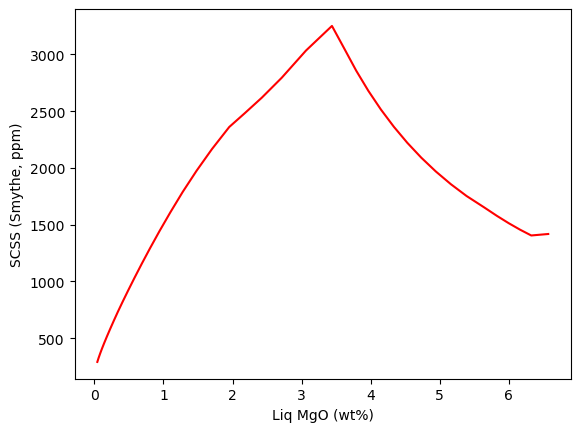

In [15]:
plt.plot(MELTS['MgO_Liq'], Smythe_CalcSulf['SCSS2_ppm_ideal_Smythe2017'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('SCSS (Smythe, ppm)')

Text(0, 0.5, 'Liq FeO (wt%)')

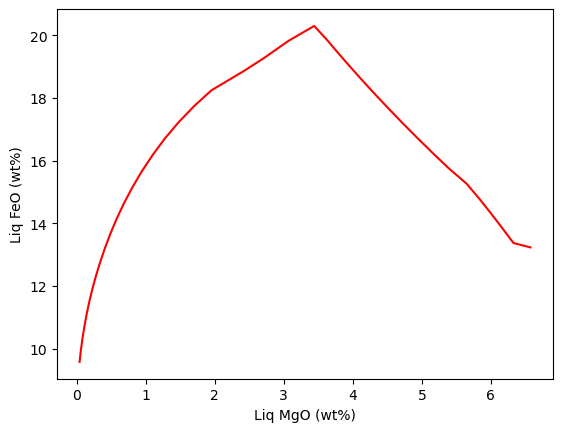

In [16]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

Text(0, 0.5, 'Liq FeO (wt%)')

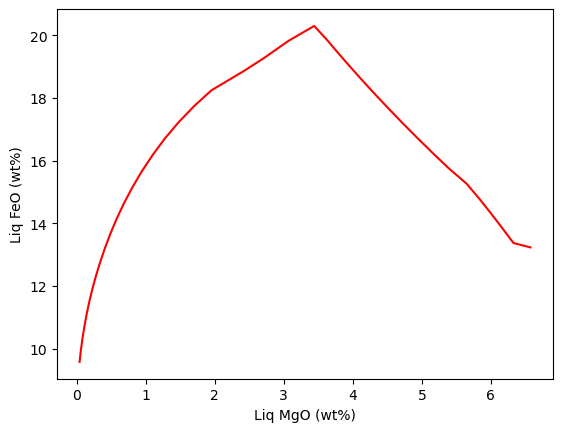

In [17]:
plt.plot( MELTS['MgO_Liq'],MELTS['FeOt_Liq'],
         '-r')
plt.xlabel('Liq MgO (wt%)')
plt.ylabel('Liq FeO (wt%)')

## Using Oneill

In [18]:
ONeill_MeasSulf=ss.calculate_O2021_SCSS(df=MELTS, T_K=MELTS['T_C']+273.15, 
P_kbar=P/1000,
Fe_FeNiCu_Sulf=0.66,
Fe3Fet_Liq=MELTS['Fe3Fet_Liq'])
ONeill_MeasSulf.head()

Using inputted Fe_FeNiCu_Sulf ratio for calculations.


,SCSS2_ppm,LnS,Ln_a_FeO,Ln_a_FeS,DeltaG,LnCS2_calc,T_C,P_bar,h,s,...,K2O_whitlockite1,P2O5_whitlockite1,H2O_whitlockite1,CO2_whitlockite1,Fe3Fet_whitlockite1,h_whitlockite1,mass_whitlockite1,v_whitlockite1,rho_whitlockite1,Fe_FeNiCu_Sulf_calc
0,1369.332818,7.222079,-2.088150,-0.514565,7.810509,-2.162014,1179.500000,1000.0,-1.180618e+06,264.233855,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
1,1345.154606,7.204264,-2.073015,-0.515840,7.846377,-2.199288,1174.505814,1000.0,-1.182400e+06,263.004796,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
2,1372.280817,7.224229,-2.043135,-0.519879,7.882506,-2.181533,1169.511628,1000.0,-1.151105e+06,254.976197,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
3,1401.183305,7.245072,-2.014732,-0.523922,7.918898,-2.164636,1164.517442,1000.0,-1.084911e+06,240.910201,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
4,1432.239603,7.266995,-1.987599,-0.527980,7.955557,-2.148181,1159.523256,1000.0,-1.024122e+06,227.964449,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.66
